In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, x_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000, 28, 28))

In [4]:
if tf.keras.backend.image_data_format() == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
    x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])
    input_shape = (1, x_train.shape[1], x_train.shape[2])
else: # 'channels_last'
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
    input_shape = (x_train.shape[1], x_train.shape[2], 1)
    

In [5]:
x_train.shape, y_train.shape, x_test.shape, x_train.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (60000, 28, 28, 1))

In [6]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [7]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
input_shape

(28, 28, 1)

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),  activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),              
             metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [21]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1)
history = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1, 
                    validation_split=0.1, callbacks=[es])

Epoch 1/20
844/844 [==============================] - 26s 31ms/step - loss: 0.1034 - categorical_accuracy: 0.9683 - val_loss: 0.0514 - val_categorical_accuracy: 0.9875
Epoch 2/20
844/844 [==============================] - 28s 33ms/step - loss: 0.0782 - categorical_accuracy: 0.9760 - val_loss: 0.0436 - val_categorical_accuracy: 0.9877
Epoch 00002: early stopping


In [22]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

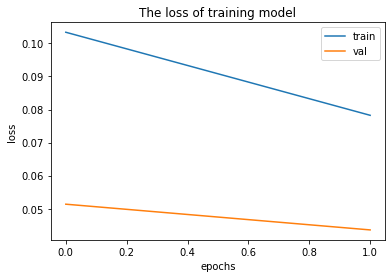

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

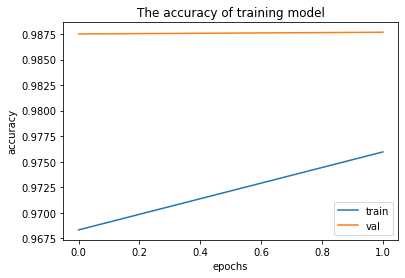

In [28]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('The accuracy of training model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [29]:
score = model.evaluate(x_test, y_test)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])


313/313 [==============================] - 1s 5ms/step - loss: 0.0413 - categorical_accuracy: 0.9863
Test Loss:  0.041330333799123764
Test Accuracy:  0.986299991607666


In [ ]:
model_json = model.to_json()